# Step 1: Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

In [2]:
skin_CD = pd.read_csv("HAM10000_metadata.csv")

In [3]:
skin_CD

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

# Step 2: Making a Dictionary of images and labels

In [4]:
project_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:/Users/abhis/Skin Cancer/HAM10000/','*','*.jpg'))}

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Step 3:Reading and Processing Data

In [6]:
skin_CD = pd.read_csv(os.path.join('C:/Users/abhis/Skin Cancer/HAM10000/','C:/Users/abhis/Skin Cancer/HAM10000/HAM10000_metadata.csv'))

In [7]:
skin_CD['route'] = skin_CD['image_id'].map(project_path_dict.get)
skin_CD['skin_type'] = skin_CD['dx'].map(lesion_type_dict.get) 
skin_CD['skin_type_idx'] = pd.Categorical(skin_CD['skin_type']).codes

In [8]:
skin_CD.head(n = 10)

lesion_id      image_id   dx dx_type   age     sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear   
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face   
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face   
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back   
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back   

                                               route  \
0  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
3  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
4  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
5  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
6  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
7  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
8  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                        skin_type  skin_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2  
5  Benign keratosis-like lesions               2  
6  Benign keratosis-like lesions               2  
7  Benign keratosis-like lesions               2  
8  Benign keratosis-like lesions               2  
9  Benign keratosis-like lesions               2

In [9]:
skin_CD.tail(n = 10)

lesion_id      image_id     dx dx_type   age     sex  \
10005  HAM_0005579  ISIC_0028393  akiec   histo  80.0    male   
10006  HAM_0004034  ISIC_0024948  akiec   histo  55.0  female   
10007  HAM_0001565  ISIC_0028619  akiec   histo  60.0  female   
10008  HAM_0001576  ISIC_0033705  akiec   histo  60.0    male   
10009  HAM_0005705  ISIC_0031430  akiec   histo  75.0  female   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female   

          localization                                              route  \
10005             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10006             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10007             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10008             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10009  lower extremity  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10010          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10011          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10012          abdomen  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10013             face  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
10014             back  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

               skin_type  skin_type_idx  
10005  Actinic keratoses              0  
10006  Actinic keratoses              0  
10007  Actinic keratoses              0  
10008  Actinic keratoses              0  
10009  Actinic keratoses              0  
10010  Actinic keratoses              0  
10011  Actinic keratoses              0  
10012  Actinic keratoses              0  
10013  Actinic keratoses              0  
10014           Melanoma              5

# Step 4: Data Cleaning

In [10]:
skin_CD.shape

(10015, 10)

In [11]:
print(skin_CD.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
route             object
skin_type         object
skin_type_idx       int8
dtype: object


In [12]:
skin_CD.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
route             0
skin_type         0
skin_type_idx     0
dtype: int64

In [13]:
skin_CD['age'].fillna((skin_CD['age'].mean()), inplace=True)

In [14]:
skin_CD.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
route            0
skin_type        0
skin_type_idx    0
dtype: int64

# Step 5: Explotary Data Analysis

In [15]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=skin_CD['sex'].value_counts().index, 
            y=skin_CD['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['localization'].value_counts().index, 
            y=skin_CD['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=skin_CD['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=skin_CD['dx'].value_counts()),
            row=2, col=2)


for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data', height=800)

fig.show()

Text(0.5, 1.0, 'Diagnosis Test Type: Distribution Plot')

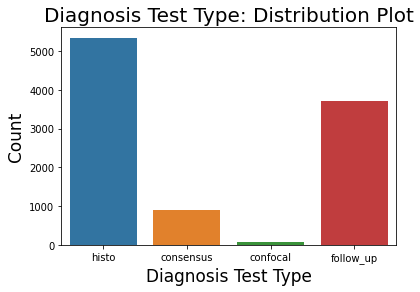

In [16]:
sns.countplot(x = "dx_type", data = skin_CD)
plt.xlabel("Diagnosis Test Type", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.title("Diagnosis Test Type: Distribution Plot", fontsize=20)

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age', ylabel='skin_type_idx'>

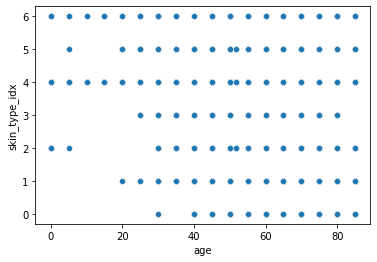

In [17]:
sns.scatterplot('age','skin_type_idx',data=skin_CD)

In [18]:
skin_CD.skin_type_idx.value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: skin_type_idx, dtype: int64

# Step 6:Oversampling

In [19]:
class_4,class_5,class_2,class_1,class_0,class_6,class_3 = skin_CD.skin_type_idx.value_counts()

skin_class_0 = skin_CD[skin_CD['skin_type_idx'] == 0]
skin_class_1 = skin_CD[skin_CD['skin_type_idx'] == 1]
skin_class_2 = skin_CD[skin_CD['skin_type_idx'] == 2]
skin_class_3 = skin_CD[skin_CD['skin_type_idx'] == 3]
skin_class_4 = skin_CD[skin_CD['skin_type_idx'] == 4]
skin_class_5 = skin_CD[skin_CD['skin_type_idx'] == 5]
skin_class_6 = skin_CD[skin_CD['skin_type_idx'] == 6]

In [20]:
class_0,class_1,class_2,class_3,class_4,class_5,class_6

(327, 514, 1099, 115, 6705, 1113, 142)

In [21]:
skin_class_0.shape

(327, 10)

In [22]:
skin_class_1.shape

(514, 10)

In [23]:
skin_class_2.shape

(1099, 10)

In [24]:
skin_class_3.shape

(115, 10)

In [25]:
skin_class_4.shape

(6705, 10)

In [26]:
skin_class_5.shape

(1113, 10)

In [27]:
skin_class_6.shape

(142, 10)

In [28]:
skin_class_0_over = skin_class_0.sample(class_4,replace = True)

In [29]:
skin_class_0_over.shape

(6705, 10)

In [30]:
skin_class_1_over = skin_class_1.sample(class_4,replace = True)

In [31]:
skin_class_1_over.shape

(6705, 10)

In [32]:
skin_class_2_over = skin_class_2.sample(class_4,replace = True)

In [33]:
skin_class_2_over.shape

(6705, 10)

In [34]:
skin_class_3_over = skin_class_3.sample(class_4,replace = True)

In [35]:
skin_class_3_over.shape

(6705, 10)

In [36]:
skin_class_5_over = skin_class_5.sample(class_4,replace = True)

In [37]:
skin_class_5_over.shape

(6705, 10)

In [38]:
skin_class_6_over = skin_class_6.sample(class_4,replace = True)

In [39]:
skin_class_6_over.shape

(6705, 10)

In [40]:
skin_CD_test_over = pd.concat([skin_class_0_over,skin_class_1_over,skin_class_2_over,skin_class_3_over
                               ,skin_class_4,skin_class_5_over,skin_class_6_over], axis = 0)

In [41]:
skin_CD_test_over.shape

(46935, 10)

In [42]:
print('Random over-sampling:')
print(skin_CD_test_over.skin_type_idx.value_counts())

Random over-sampling:
0    6705
1    6705
2    6705
3    6705
4    6705
5    6705
6    6705
Name: skin_type_idx, dtype: int64


# Step 7:Loading and Resizing of Images

In [43]:
skin_CD_test_over['image'] = skin_CD_test_over['route'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [44]:
skin_CD_test_over.head()

lesion_id      image_id     dx dx_type   age     sex     localization  \
9799  HAM_0000456  ISIC_0026466  akiec   histo  65.0  female  upper extremity   
9720  HAM_0003141  ISIC_0031918  akiec   histo  65.0    male             neck   
9963  HAM_0004033  ISIC_0027452  akiec   histo  70.0    male  upper extremity   
9740  HAM_0003161  ISIC_0030191  akiec   histo  60.0  female  lower extremity   
9906  HAM_0001004  ISIC_0024923  akiec   histo  75.0  female  lower extremity   

                                                  route          skin_type  \
9799  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9720  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9963  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9740  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   
9906  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...  Actinic keratoses   

      skin_type_idx                                              image  
9799              0  [[[167, 109, 112], [167, 109, 111], [169, 111,...  
9720              0  [[[204, 164, 155], [202, 164, 159], [200, 160,...  
9963              0  [[[226, 171, 202], [228, 175, 205], [227, 179,...  
9740              0  [[[213, 192, 213], [213, 189, 209], [214, 184,...  
9906              0  [[[153, 116, 118], [159, 122, 124], [164, 128,...

# Step 8: Take out the sample data

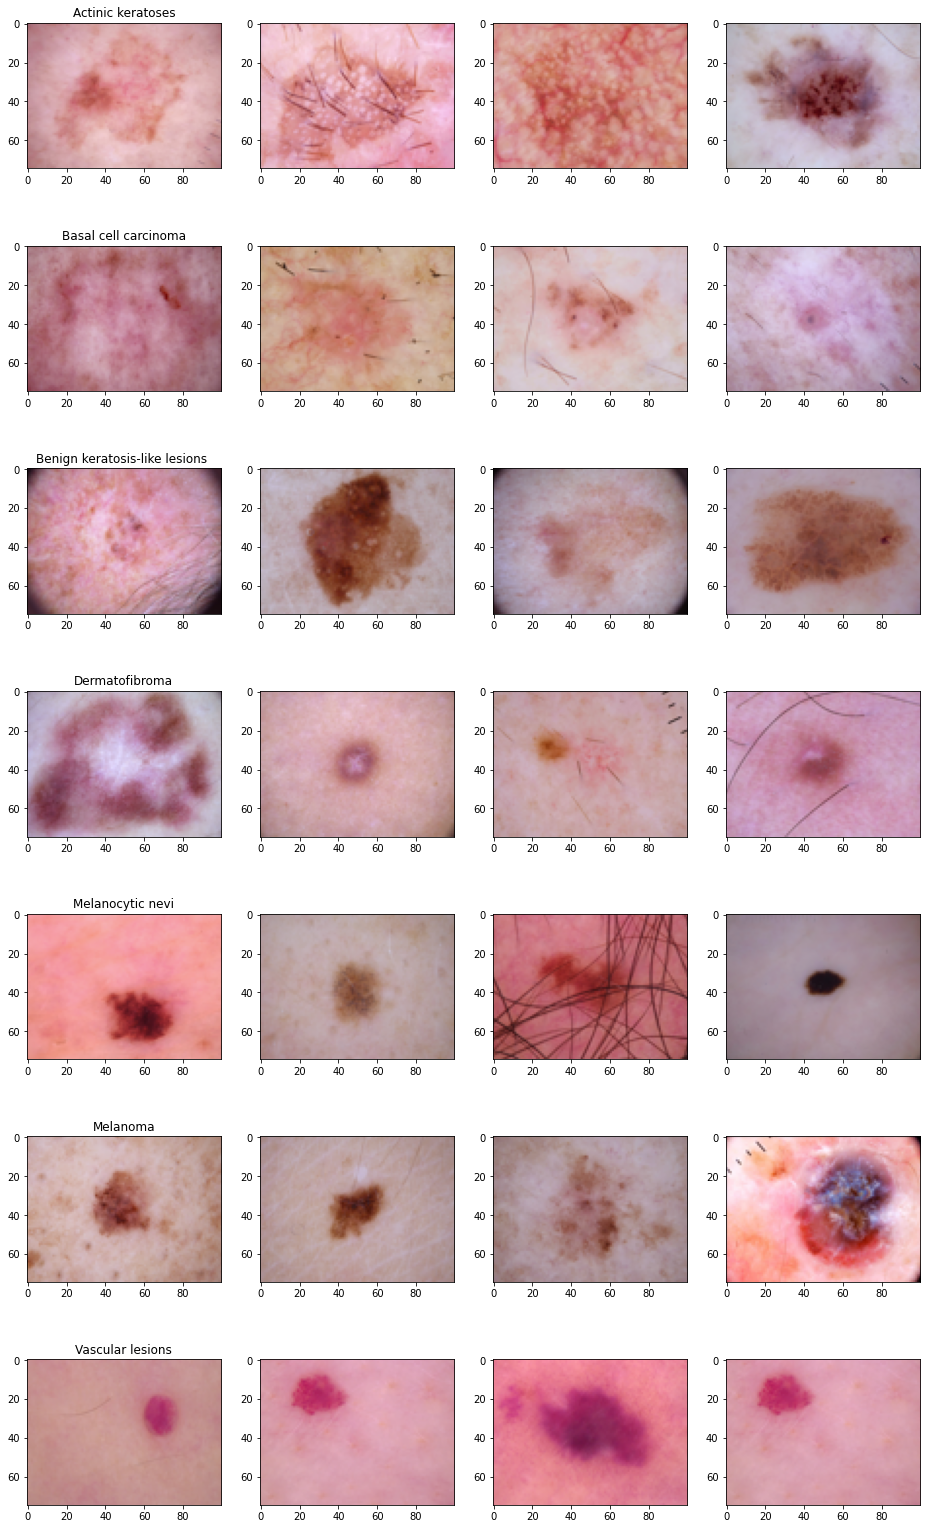

In [46]:
n_samples = 4
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 4*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_CD_test_over.sort_values(['skin_type']).groupby('skin_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=41).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('on')
fig.savefig('samples.png', dpi=300)

# Step 9: Selection of Depended and Independed Variables

In [47]:
features=skin_CD_test_over.drop(columns=['skin_type_idx','skin_type','dx'],axis=1)
target=skin_CD_test_over['skin_type_idx']

# Step 10: Train and Test Data Splitting

In [48]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=41, stratify = target)

In [49]:
x_train.head()

lesion_id      image_id    dx_type   age   sex     localization  \
9955  HAM_0001416  ISIC_0025427      histo  85.0  male  upper extremity   
2846  HAM_0000987  ISIC_0027722      histo  70.0  male             back   
903   HAM_0002462  ISIC_0024498  consensus  70.0  male             face   
2898  HAM_0006904  ISIC_0027291      histo  70.0  male             back   
2080  HAM_0002375  ISIC_0027442      histo  80.0  male             neck   

                                                  route  \
9955  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2846  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
903   C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2898  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2080  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                                                  image  
9955  [[[177, 101, 105], [181, 113, 122], [182, 113,...  
2846  [[[200, 166, 181], [203, 170, 185], [206, 174,...  
903   [[[59, 29, 28], [59, 29, 29], [59, 30, 30], [5...  
2898  [[[174, 145, 159], [172, 139, 147], [152, 114,...  
2080  [[[221, 193, 195], [221, 189, 186], [212, 178,...

In [50]:
x_test.head()

lesion_id      image_id dx_type   age     sex     localization  \
1136  HAM_0004371  ISIC_0027626   histo  45.0  female  upper extremity   
9731  HAM_0001383  ISIC_0027700   histo  80.0    male  upper extremity   
9934  HAM_0003107  ISIC_0030844   histo  80.0  female  upper extremity   
2767  HAM_0005536  ISIC_0026798   histo  45.0    male  lower extremity   
1096  HAM_0005276  ISIC_0028790   histo  75.0    male             back   

                                                  route  \
1136  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9731  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
9934  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
2767  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   
1096  C:/Users/abhis/Skin Cancer/HAM10000\HAM10000_i...   

                                                  image  
1136  [[[137, 123, 134], [145, 129, 136], [152, 137,...  
9731  [[[174, 145, 150], [172, 140, 143], [176, 145,...  
9934  [[[173, 139, 126], [171, 136, 125], [174, 141,...  
2767  [[[197, 166, 162], [199, 168, 166], [199, 168,...  
1096  [[[208, 159, 166], [214, 165, 173], [218, 167,...

In [51]:
y_train.value_counts()

1    4694
5    4694
6    4694
0    4693
2    4693
4    4693
3    4693
Name: skin_type_idx, dtype: int64

In [52]:
y_test.value_counts()

3    2012
0    2012
2    2012
4    2012
1    2011
6    2011
5    2011
Name: skin_type_idx, dtype: int64

# Step 11:Normalization

In [53]:
x_train_1 = x_train['image'].tolist()

x_train_mean = np.mean(x_train_1)
x_train_std = np.std(x_train_1)

x_train_1 = (x_train_1 - x_train_mean)/x_train_std

In [54]:
print('Train min=%.3f, max=%.3f' % (x_train_1.min(), x_train_1.max()))

Train min=-3.927, max=2.185


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


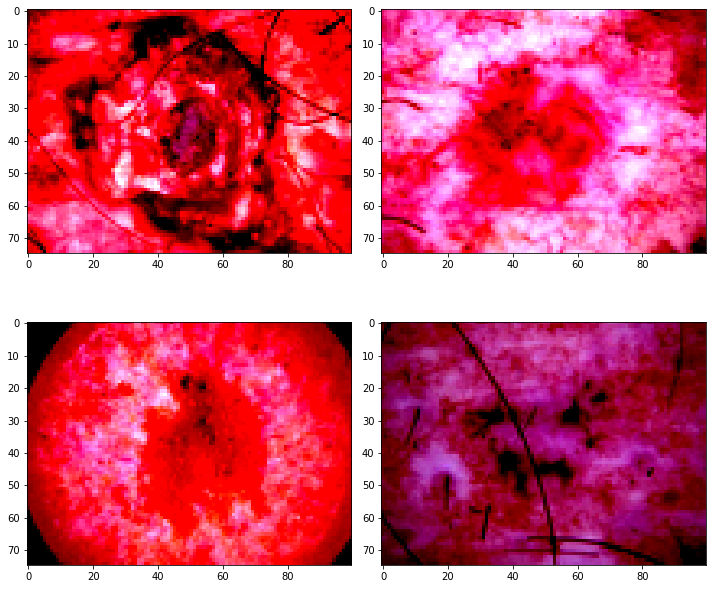

In [55]:
fig, (ax) = plt.subplots(2, 2, figsize = (10, 10))
k = 0 
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_train_1[k])
        ax[i,j].axis('on')
        k = k + 1  
    plt.tight_layout()

# Step 12: Label Encoding

In [56]:
y_train_1 = to_categorical(y_train, num_classes = 7)
y_test_1 = to_categorical(y_test, num_classes = 7)

In [57]:
print(y_train_1)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [58]:
print(y_test_1)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# Step 13: Model Building

In [59]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (75, 100, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 100, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 37, 50, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 48, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 46, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 23, 64)       0

# Step 14: Define the Optimizer, Compile the model, set learning rate reduction and apply data augmentation

In [60]:
optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [61]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [62]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [63]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train_1)

# Step 15: Model Training

In [64]:
epochs = 75
batch_size = 64
history = model.fit(datagen.flow(x_train_1, y_train_1, batch_size = batch_size),
                             epochs = epochs,
                             verbose = 1,steps_per_epoch = x_train.shape[0] // batch_size,
                             callbacks = [learning_rate_reduction])

Epoch 1/75
513/513 [==============================] - 318s 614ms/step - loss: 1.5316 - accuracy: 0.3859 - lr: 0.0100
Epoch 2/75
513/513 [==============================] - 312s 608ms/step - loss: 1.4043 - accuracy: 0.4480 - lr: 0.0100
Epoch 3/75
513/513 [==============================] - 312s 607ms/step - loss: 1.2219 - accuracy: 0.5187 - lr: 0.0100
Epoch 4/75
513/513 [==============================] - 313s 609ms/step - loss: 1.1364 - accuracy: 0.5610 - lr: 0.0100
Epoch 5/75
513/513 [==============================] - 314s 611ms/step - loss: 1.0697 - accuracy: 0.5941 - lr: 0.0100
Epoch 6/75
513/513 [==============================] - 313s 610ms/step - loss: 1.1021 - accuracy: 0.5778 - lr: 0.0100
Epoch 7/75
513/513 [==============================] - 314s 612ms/step - loss: 1.0626 - accuracy: 0.5954 - lr: 0.0100
Epoch 8/75
513/513 [==============================] - 311s 607ms/step - loss: 1.0079 - accuracy: 0.6189 - lr: 0.0100
Epoch 9/75
513/513 [==============================] - 314s 611ms

Epoch 25/75
513/513 [==============================] - 311s 607ms/step - loss: 0.3513 - accuracy: 0.8697 - lr: 0.0100
Epoch 26/75
513/513 [==============================] - 311s 605ms/step - loss: 0.3387 - accuracy: 0.8751 - lr: 0.0100
Epoch 27/75
513/513 [==============================] - 311s 607ms/step - loss: 0.3239 - accuracy: 0.8830 - lr: 0.0100
Epoch 28/75
513/513 [==============================] - 311s 606ms/step - loss: 0.3128 - accuracy: 0.8852 - lr: 0.0100
Epoch 29/75
513/513 [==============================] - 312s 608ms/step - loss: 0.3041 - accuracy: 0.8910 - lr: 0.0100
Epoch 30/75
513/513 [==============================] - 311s 607ms/step - loss: 0.2875 - accuracy: 0.8954 - lr: 0.0100
Epoch 31/75
513/513 [==============================] - 311s 606ms/step - loss: 0.2804 - accuracy: 0.8980 - lr: 0.0100
Epoch 32/75
513/513 [==============================] - 311s 606ms/step - loss: 0.2732 - accuracy: 0.9006 - lr: 0.0100
Epoch 33/75
513/513 [==============================] - 3

Epoch 49/75
513/513 [==============================] - 312s 608ms/step - loss: 0.1710 - accuracy: 0.9382 - lr: 0.0100
Epoch 50/75
513/513 [==============================] - 312s 607ms/step - loss: 0.1671 - accuracy: 0.9403 - lr: 0.0100
Epoch 51/75
513/513 [==============================] - 313s 609ms/step - loss: 0.1644 - accuracy: 0.9412 - lr: 0.0100
Epoch 52/75
513/513 [==============================] - 314s 611ms/step - loss: 0.1554 - accuracy: 0.9439 - lr: 0.0100
Epoch 53/75
513/513 [==============================] - 312s 609ms/step - loss: 0.1578 - accuracy: 0.9428 - lr: 0.0100
Epoch 54/75
513/513 [==============================] - 314s 611ms/step - loss: 0.1478 - accuracy: 0.9471 - lr: 0.0100
Epoch 55/75
513/513 [==============================] - 314s 612ms/step - loss: 0.1555 - accuracy: 0.9446 - lr: 0.0100
Epoch 56/75
513/513 [==============================] - 313s 610ms/step - loss: 0.1425 - accuracy: 0.9496 - lr: 0.0100
Epoch 57/75
513/513 [==============================] - 3

Epoch 73/75
513/513 [==============================] - 311s 606ms/step - loss: 0.1059 - accuracy: 0.9631 - lr: 0.0100
Epoch 74/75
513/513 [==============================] - 311s 606ms/step - loss: 0.1009 - accuracy: 0.9654 - lr: 0.0100
Epoch 75/75
513/513 [==============================] - 313s 610ms/step - loss: 0.0992 - accuracy: 0.9642 - lr: 0.0100


# Step 16: Model Testing and Model Evaluation

In [65]:
x_test_1 = x_test['image'].tolist()

x_test_mean = np.mean(x_test_1)
x_test_std = np.std(x_test_1)

x_test_1 = (x_test_1 - x_test_mean)/x_test_std

In [66]:
loss, accuracy = model.evaluate(x_test_1, y_test_1, verbose = 1)
print("Test: Accuracy = %f ; loss_v = %f" %(accuracy, loss))
model.save("model_75_64.h5")

441/441 [==============================] - 33s 71ms/step - loss: 13.3486 - accuracy: 0.9695
Test: Accuracy = 0.969533 ; loss_v = 13.348638


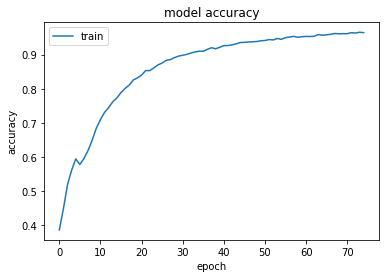

In [67]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

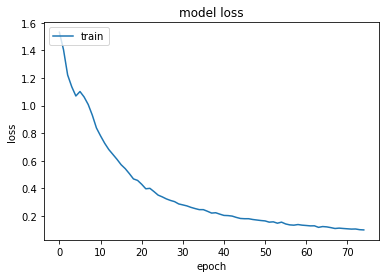

In [68]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

# Step 17: Confusion Matrix

In [69]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#The number of correct and incorrect predictions are summarized with count values and broken down by each class in a confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification report for classifier <keras.engine.sequential.Sequential object at 0x0000025582B78310>:
                                precision    recall  f1-score   support

              Melanocytic nevi       0.99      1.00      1.00      2012
                      Melanoma       0.97      1.00      0.99      2011
Benign keratosis-like lesions        0.94      0.99      0.96      2012
          Basal cell carcinoma       1.00      1.00      1.00      2012
             Actinic keratoses       0.99      0.80      0.89      2012
              Vascular lesions       0.91      0.99      0.95      2011
                Dermatofibroma       1.00      1.00      1.00      2011

                      accuracy                           0.97     14081
                     macro avg       0.97      0.97      0.97     14081
                  weighted avg       0.97      0.97      0.97     14081




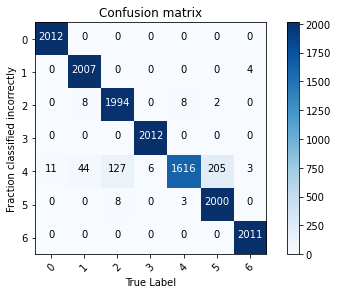

In [70]:
from sklearn import metrics
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_1,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))

# Step 18: Predicting Result

In [ ]:
model = tf.keras.load_model('model_75_64.h5')

In [72]:
pred = model.predict(x_test_1)

In [73]:
lesion_type_dict = {
    0: 'Melanocytic nevi',
    1: 'Melanoma',
    2: 'Benign keratosis-like lesions ',
    3: 'Basal cell carcinoma',
    4: 'Actinic keratoses',
    5: 'Vascular lesions',
    6: 'Dermatofibroma'
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


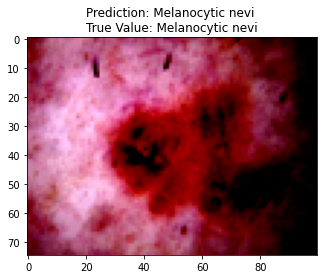

In [74]:
import matplotlib.pyplot as plt
plt.imshow(x_test_1[11].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[11])], lesion_type_dict[np.argmax(y_test_1[11])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


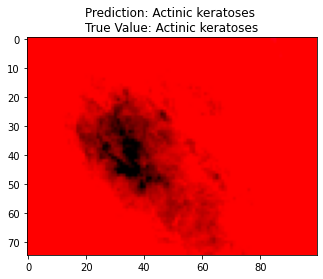

In [211]:
plt.imshow(x_test_1[9].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[9])], lesion_type_dict[np.argmax(y_test_1[9])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


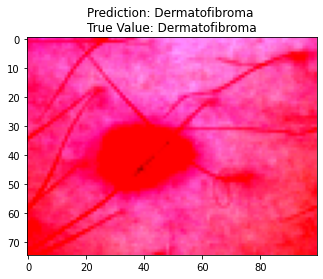

In [79]:
plt.imshow(x_test_1[13].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[13])], lesion_type_dict[np.argmax(y_test_1[13])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


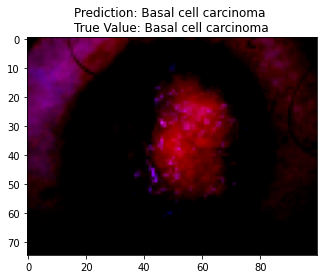

In [80]:
plt.imshow(x_test_1[14].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[14])], lesion_type_dict[np.argmax(y_test_1[14])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


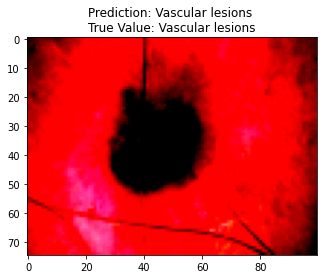

In [81]:
plt.imshow(x_test_1[7].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[7])], lesion_type_dict[np.argmax(y_test_1[7])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


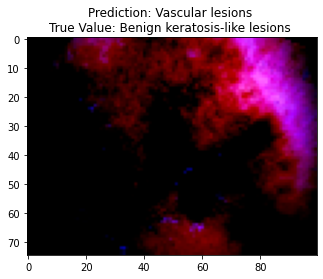

In [82]:
plt.imshow(x_test_1[28].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[28])], lesion_type_dict[np.argmax(y_test_1[25])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


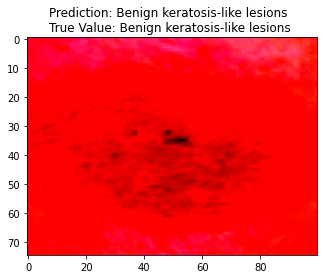

In [83]:
plt.imshow(x_test_1[69].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[69])], lesion_type_dict[np.argmax(y_test_1[69])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


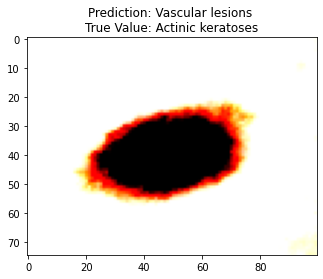

In [84]:
plt.imshow(x_test_1[751].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[751])], lesion_type_dict[np.argmax(y_test_1[751])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


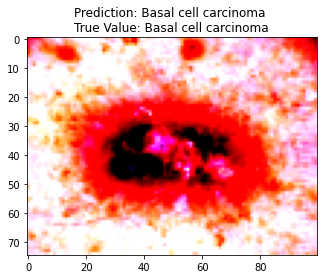

In [85]:
plt.imshow(x_test_1[4].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[4])], lesion_type_dict[np.argmax(y_test_1[4])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


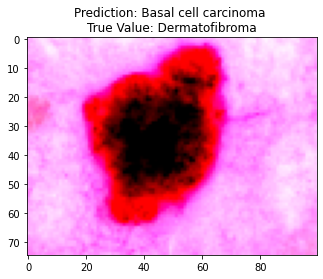

In [89]:
plt.imshow(x_test_1[380].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[3800])], lesion_type_dict[np.argmax(y_test_1[380])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


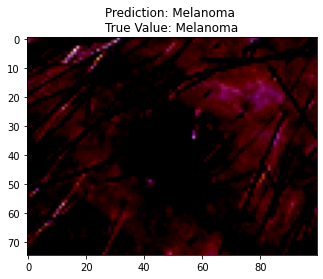

In [90]:
plt.imshow(x_test_1[100].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[100])], lesion_type_dict[np.argmax(y_test_1[100])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


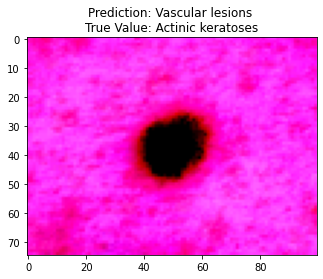

In [94]:
plt.imshow(x_test_1[50].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[50])], lesion_type_dict[np.argmax(y_test_1[50])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


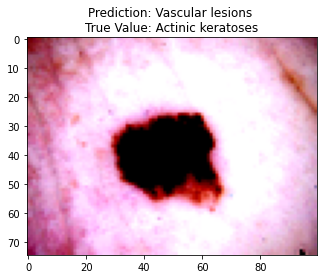

In [101]:
plt.imshow(x_test_1[130].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[130])], lesion_type_dict[np.argmax(y_test_1[130])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


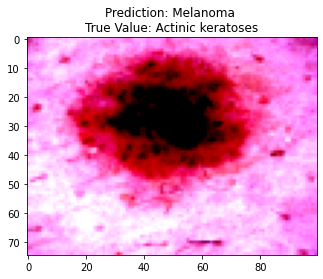

In [113]:
plt.imshow(x_test_1[80].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[80])], lesion_type_dict[np.argmax(y_test_1[80])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


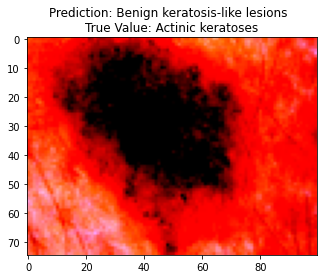

In [140]:
plt.imshow(x_test_1[699].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[699])], lesion_type_dict[np.argmax(y_test_1[699])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


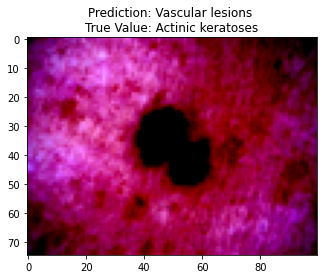

In [150]:
plt.imshow(x_test_1[315].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[315])], lesion_type_dict[np.argmax(y_test_1[315])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


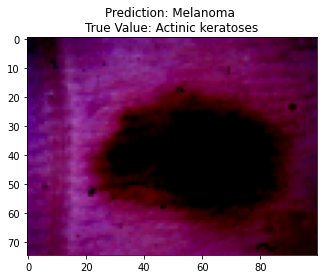

In [175]:
plt.imshow(x_test_1[7941].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[7941])], lesion_type_dict[np.argmax(y_test_1[7941])]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


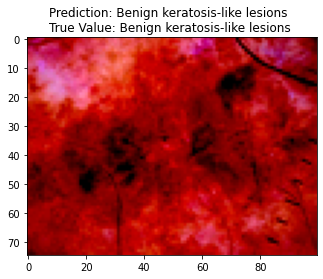

In [209]:
plt.imshow(x_test_1[13357].reshape(75,100,3), cmap='viridis')
plt.title('Prediction: {} \nTrue Value: {}'.format(lesion_type_dict[np.argmax(pred[13357])], lesion_type_dict[np.argmax(y_test_1[13357])]))
plt.show()